In [1]:
import pandas as pd
import numpy as np

#from feature_selector import FeatureSelector
from feature_selector_lightgbm import FeatureSelector

In [2]:
train_features = pd.read_csv('./application_train.csv')
train_labels = train_features['TARGET']
train_features.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
train_features["TARGET"].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [4]:
train_features = train_features.drop(columns = ['TARGET'])
train_features

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,454500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,1395000.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,Cash loans,M,Y,Y,0,360000.000,1530000.0,42075.0,1530000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,913500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,Revolving loans,M,N,Y,0,135000.000,405000.0,20250.0,405000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
fs = FeatureSelector(data = train_features, labels = train_labels)

In [6]:
fs.identify_missing(missing_threshold=0.6)

17 features with greater than 0.60 missing values.



In [7]:
missing_features = fs.ops['missing']
missing_features[:10]

['OWN_CAR_AGE',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'FLOORSMIN_AVG',
 'LIVINGAPARTMENTS_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'FLOORSMIN_MODE',
 'LIVINGAPARTMENTS_MODE']

In [8]:
fs.missing_stats

,missing_fraction
COMMONAREA_AVG,0.698723
COMMONAREA_MODE,0.698723
COMMONAREA_MEDI,0.698723
NONLIVINGAPARTMENTS_AVG,0.694330
NONLIVINGAPARTMENTS_MODE,0.694330
NONLIVINGAPARTMENTS_MEDI,0.694330
FONDKAPREMONT_MODE,0.683862
LIVINGAPARTMENTS_MEDI,0.683550
LIVINGAPARTMENTS_AVG,0.683550
LIVINGAPARTMENTS_MODE,0.683550


In [9]:
fs.identify_single_unique()

0 features with a single unique value.



In [10]:
single_unique = fs.ops['single_unique']
single_unique

[]

In [11]:
fs.unique_stats.sample(5)

,nunique
BASEMENTAREA_AVG,3780
NONLIVINGAPARTMENTS_MODE,167
AMT_REQ_CREDIT_BUREAU_QRT,11
ELEVATORS_AVG,257
EXT_SOURCE_3,814


In [12]:
fs.identify_collinear(correlation_threshold=0.975)


23 features with a correlation magnitude greater than 0.97.



In [13]:
correlated_features = fs.ops['collinear']
correlated_features[:5]

['AMT_GOODS_PRICE',
 'FLAG_EMP_PHONE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE']

In [14]:
fs.record_collinear.head()

,corr_feature,corr_value,drop_feature
0,AMT_CREDIT,0.986968,AMT_GOODS_PRICE
1,DAYS_EMPLOYED,-0.999755,FLAG_EMP_PHONE
2,YEARS_BUILD_AVG,0.989444,YEARS_BUILD_MODE
3,COMMONAREA_AVG,0.977147,COMMONAREA_MODE
4,ELEVATORS_AVG,0.978837,ELEVATORS_MODE


In [15]:
fs.identify_zero_importance(task = 'classification', eval_metric = 'auc', 
                            n_iterations = 10, early_stopping = True)

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[299]	valid_0's auc: 0.755876
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[339]	valid_0's auc: 0.757354
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[248]	valid_0's auc: 0.752632
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[272]	valid_0's auc: 0.758045
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[385]	valid_0's auc: 0.76319
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[212]	valid_0's auc: 0.755108
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[172]	valid_0's auc: 0.762251
Training until validation scores don't improve for 100 rounds.
Early st

In [16]:
one_hot_features = fs.one_hot_features
base_features = fs.base_features
print('There are %d original features' % len(base_features))
print('There are %d one-hot features' % len(one_hot_features))

There are 121 original features
There are 140 one-hot features


In [17]:
train_features.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
fs.data_all.head()

,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Children,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,0,1,0,0,1,0,1,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,1,0,0,1,0,0,1,0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:

zero_importance_features= fs.ops['zero_importance']
zero_importance_features

['ORGANIZATION_TYPE_Religion',
 'FLAG_DOCUMENT_17',
 'NAME_INCOME_TYPE_Businessman',
 'NAME_INCOME_TYPE_Maternity leave',
 'FLAG_MOBIL',
 'NAME_INCOME_TYPE_Student',
 'CODE_GENDER_XNA',
 'FLAG_DOCUMENT_21',
 'FLAG_DOCUMENT_20',
 'NAME_FAMILY_STATUS_Unknown',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_12',
 'ORGANIZATION_TYPE_Trade: type 5',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_4',
 'ORGANIZATION_TYPE_XNA',
 'FLAG_DOCUMENT_2',
 'ORGANIZATION_TYPE_Industry: type 10',
 'ORGANIZATION_TYPE_Industry: type 13',
 'ORGANIZATION_TYPE_Industry: type 6',
 'ORGANIZATION_TYPE_Industry: type 8',
 'NAME_TYPE_SUITE_Group of people']

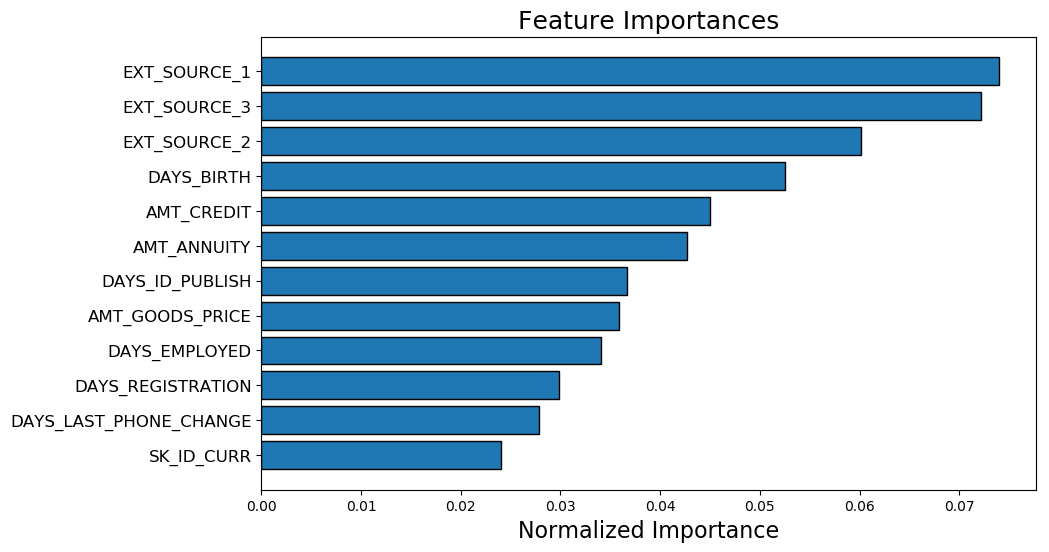

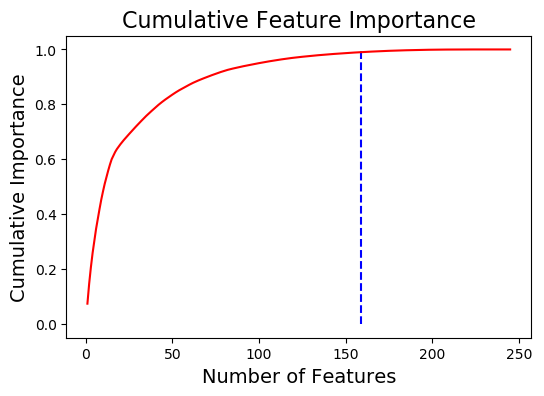

159 features required for 0.99 of cumulative importance


In [20]:
fs.plot_feature_importances(threshold = 0.99, plot_n = 12)

In [21]:
fs.feature_importances.head(10)

,feature,importance,normalized_importance,cumulative_importance
0,EXT_SOURCE_1,612.1,0.074032,0.074032
1,EXT_SOURCE_3,596.7,0.072170,0.146202
2,EXT_SOURCE_2,497.7,0.060196,0.206398
3,DAYS_BIRTH,434.1,0.052504,0.258902
4,AMT_CREDIT,372.0,0.044993,0.303895
5,AMT_ANNUITY,353.3,0.042731,0.346626
6,DAYS_ID_PUBLISH,303.3,0.036684,0.383309
7,AMT_GOODS_PRICE,296.5,0.035861,0.419170
8,DAYS_EMPLOYED,281.3,0.034023,0.453193
9,DAYS_REGISTRATION,247.2,0.029898,0.483091


In [22]:
fs.identify_low_importance(cumulative_importance = 0.99)

158 features required for cumulative importance of 0.99 after one hot encoding.
87 features do not contribute to cumulative importance of 0.99.



In [23]:
low_importance_features = fs.ops['low_importance']
low_importance_features[:5]

['NAME_TYPE_SUITE_Spouse, partner',
 'HOUSETYPE_MODE_specific housing',
 'ORGANIZATION_TYPE_Medicine',
 'OCCUPATION_TYPE_Private service staff',
 'WALLSMATERIAL_MODE_Block']

In [24]:

fs=  FeatureSelector(data = train_features, labels = train_labels)

fs.identify_all(selection_params = {'missing_threshold': 0.6, 'correlation_threshold': 0.98, 
                                    'task': 'classification', 'eval_metric': 'auc', 
                                     'cumulative_importance': 0.99})

17 features with greater than 0.60 missing values.

0 features with a single unique value.

20 features with a correlation magnitude greater than 0.98.

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[323]	valid_0's auc: 0.761027
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[272]	valid_0's auc: 0.75967
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[280]	valid_0's auc: 0.763101
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[360]	valid_0's auc: 0.752936
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[546]	valid_0's auc: 0.752375
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[344]	valid_0's auc: 0.755253
Training until validation scores don't improve

In [25]:
train_no_missing_zero = fs.remove(methods = ['missing', 'zero_importance'])

Removed 38 features.


In [26]:
train_no_missing_zero

,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,...,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,0,0,1,1,0,0,1,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,0,1,0,1,0,1,0,0,1,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,0,1,0,1,0,1,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,1,0,1,0,0,1,0,0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,1,0,0,1,1,0,0,1,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,1,0,0,1,1,0,0,1,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,1,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,1,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,1,0,1,0,1,0,0,1,1,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,0,1,0,1,1,0,0,1,0,0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
train_removed_all = fs.remove(methods = 'all', keep_one_hot=False)

['missing', 'single_unique', 'collinear', 'zero_importance', 'low_importance'] methods have been run

Removed 183 features including one-hot features.


In [28]:
train_removed_all

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_18,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,Family,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,Unaccompanied,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,"Spouse, partner",...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,Unaccompanied,...,1,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,Cash loans,M,Y,Y,0,360000.000,1530000.0,42075.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,Children,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,Revolving loans,M,N,Y,0,135000.000,405000.0,20250.0,Unaccompanied,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
